[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


   Unnamed: 0                                               Data       Labels
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB
None
Accuracy: 0.8898
Precision: 0.8898
Recall: 0.8898
F1-Score: 0.8891
                          precision    recall  f1-score   support

             alt.atheism       0.

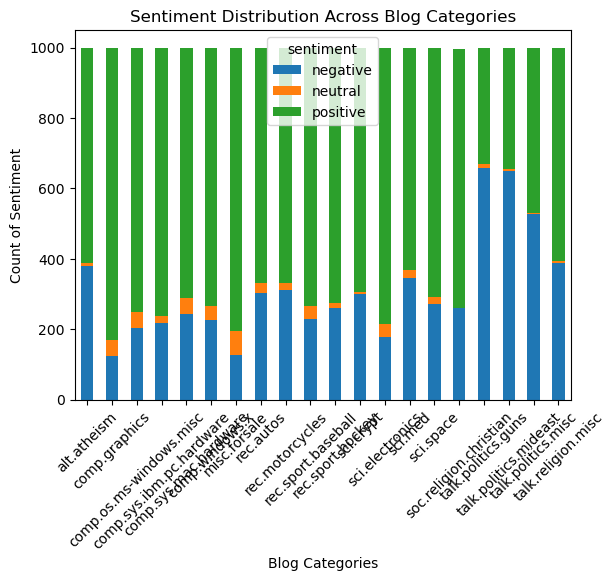

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data (run this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load the dataset
file_path = r'D:/EXCELR/Assignments/Naive Bayes and Text Mining/blogs_categories.csv'  # Replace with actual path if necessary
data = pd.read_csv(file_path)

# Inspect the dataset structure
print(data.head())
print(data.info())

# 1. Data Exploration and Preprocessing
# Clean text: Remove punctuation, convert to lowercase, tokenize, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and non-alphabetical characters
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_tokens)

# Apply preprocessing to the 'Data' column
data['cleaned_text'] = data['Data'].apply(preprocess_text)

# 2. Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Target labels (categories)
y = data['Labels']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Naive Bayes Model for Text Classification
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# 4. Evaluation of the Naive Bayes Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred))

# 5. Sentiment Analysis
# Using NLTK's SentimentIntensityAnalyzer for sentiment analysis
sia = SentimentIntensityAnalyzer()

# Function to categorize sentiment as positive, negative, or neutral
def get_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] > 0.05:
        return 'positive'
    elif sentiment_scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the blog posts
data['sentiment'] = data['Data'].apply(get_sentiment)

# Analyze sentiment distribution across categories
sentiment_distribution = data.groupby(['Labels', 'sentiment']).size().unstack(fill_value=0)
print(sentiment_distribution)

# Summary of findings
print("Sentiment analysis summary by category:")
print(sentiment_distribution)

# Optional: You can visualize the sentiment distribution using a bar plot
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Blog Categories')
plt.xlabel('Blog Categories')
plt.ylabel('Count of Sentiment')
plt.xticks(rotation=45)
plt.show()


# Step-by-Step Breakdown:
Data Loading: The dataset is loaded from the provided CSV file (blogs_categories.csv).

Text Preprocessing:

The preprocess_text function cleans the text by removing punctuation, converting to lowercase, and tokenizing the words.
Stopwords (common words like "the", "and") are removed using NLTK's stopword list.

Feature Extraction (TF-IDF):

The cleaned text is transformed into numerical format using the TF-IDF vectorizer (TfidfVectorizer), which converts the text data into a sparse matrix of features.

Naive Bayes Classifier:

The dataset is split into a training set (80%) and a test set (20%).
A Naive Bayes classifier (MultinomialNB) is trained on the training data and evaluated on the test data.

Evaluation:

Metrics like accuracy, precision, recall, and F1-score are computed for the model’s performance.
A detailed classification report is generated to show how well the classifier performs on each category.

Sentiment Analysis:

NLTK’s SentimentIntensityAnalyzer is used to analyze the sentiment of each blog post. Sentiments are classified as positive, negative, or neutral based on the compound score.
The distribution of sentiments across the different blog categories is analyzed and summarized.

Output:
Model Performance: Displays accuracy, precision, recall, F1-score, and a detailed classification report.
Sentiment Analysis: The distribution of sentiments (positive, negative, neutral) across different blog categories is presented and optionally visualized using a bar plot.